In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import os

dataset_folder = 'dataset/'
filenames = []
for filename in os.listdir(dataset_folder):
    if filename.find("_AFDB_") > -1:
        filenames.append(filename)

In [3]:
filenames

['test_AFDB_04015.csv',
 'test_AFDB_04043.csv',
 'test_AFDB_04048.csv',
 'test_AFDB_04936.csv',
 'test_AFDB_05091.csv',
 'test_AFDB_05121.csv',
 'test_AFDB_05261.csv',
 'test_AFDB_06426.csv',
 'test_AFDB_06453.csv',
 'test_AFDB_06995.csv',
 'test_AFDB_07910.csv',
 'test_AFDB_08215.csv',
 'test_AFDB_08219.csv',
 'test_AFDB_08378.csv',
 'test_AFDB_08455.csv',
 'train_AFDB_04015_balanced.csv',
 'train_AFDB_04043_balanced.csv',
 'train_AFDB_04048_balanced.csv',
 'train_AFDB_04936_balanced.csv',
 'train_AFDB_05091_balanced.csv',
 'train_AFDB_05121_balanced.csv',
 'train_AFDB_05261_balanced.csv',
 'train_AFDB_06426_balanced.csv',
 'train_AFDB_06453_balanced.csv',
 'train_AFDB_06995_balanced.csv',
 'train_AFDB_07910_balanced.csv',
 'train_AFDB_08215_balanced.csv',
 'train_AFDB_08219_balanced.csv',
 'train_AFDB_08378_balanced.csv',
 'train_AFDB_08455_balanced.csv']

In [4]:
train_dfs = []
test_dfs = []
for name in filenames :
    if name.find('train_') > -1:
        train_df = pd.read_csv(dataset_folder + name, header=None)
        train_dfs.append(train_df)
    if name.find('test_') > -1:
        test_df = pd.read_csv(dataset_folder + name, header=None)
        test_dfs.append(test_df)

In [5]:
train_df_all = pd.concat(train_dfs, ignore_index=True)
test_df_all = pd.concat(test_dfs, ignore_index=True)

In [6]:
train_df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33060 entries, 0 to 33059
Columns: 301 entries, 0 to 300
dtypes: float64(300), int64(1)
memory usage: 75.9 MB


In [7]:
test_df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12929 entries, 0 to 12928
Columns: 301 entries, 0 to 300
dtypes: float64(301)
memory usage: 29.7 MB


In [8]:
train_df_all.to_csv(dataset_folder + "train_all.csv", index=None, header=None)

In [9]:
test_df_all.to_csv(dataset_folder + "test_all.csv", index=None, header=None)

## Check Histogram

In [16]:
def plot_hist(df, name, class_number, min_, size, fs=250):
    # filter data berdasarkan class_number 
    ECG=df.loc[df[300]==class_number].values
    
    # scale tm value (*1000) agar bisa ditampilkan dalam satuam (ms)
    tm = np.arange(ECG.shape[1], dtype='float') / fs * 1000
    
    # ambil data hanya pada kolom `min_` sampai `size`
    # convert ke 1D array
    ECG=ECG[:,min_:size]
    ECG_flatten=ECG.flatten()
    
    # generate time data untuk tiap kolom sample, 
    # ulang sebanyak ECG.shape[0]
    times = np.tile(tm[min_:size], ECG.shape[0]) 

    # plot sebagai 2D histogram
    plt.hist2d(times, ECG_flatten, bins=(80,80), cmap=plt.cm.jet)
    plt.title("2D Hist %s - class %s " % (name, str(class_number)))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

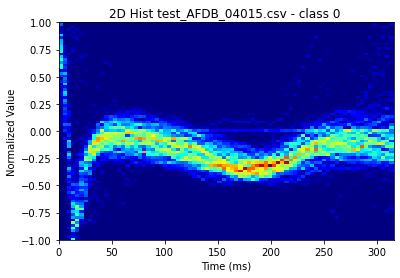

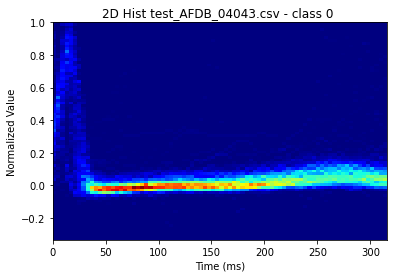

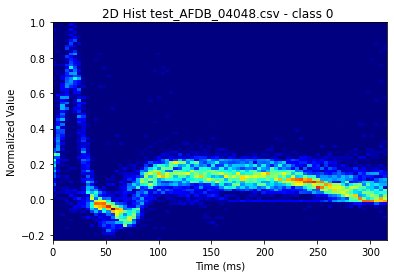

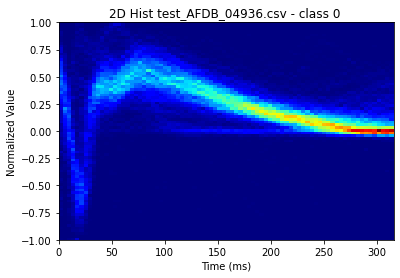

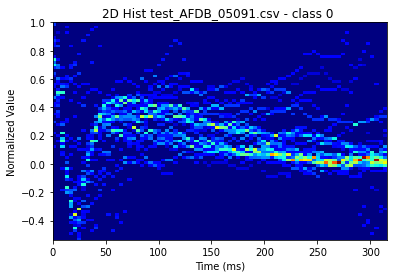

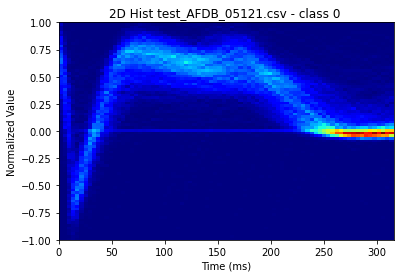

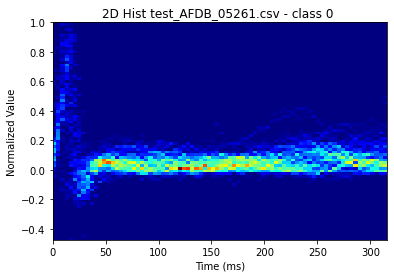

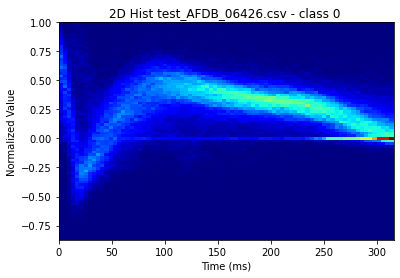

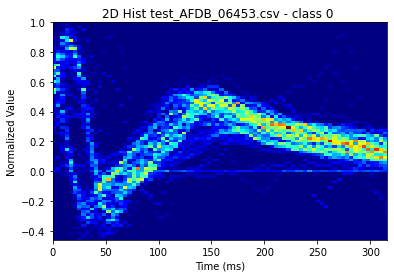

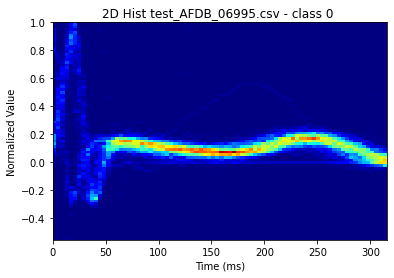

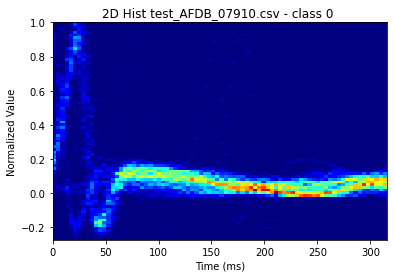

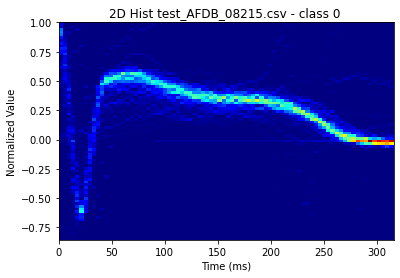

In [26]:
for tdf, name in zip(train_dfs, filenames):
    plot_hist(tdf, name, class_number=0, min_=0, size=80)

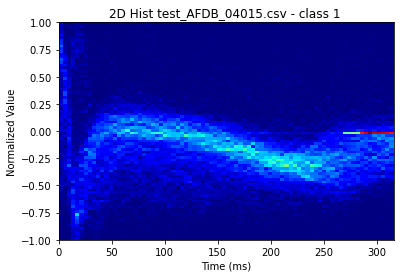

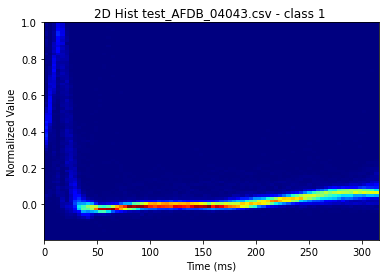

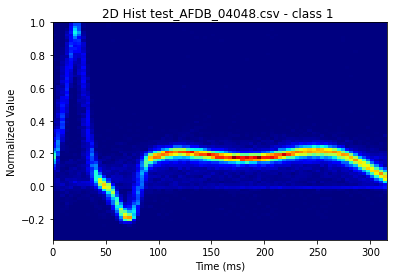

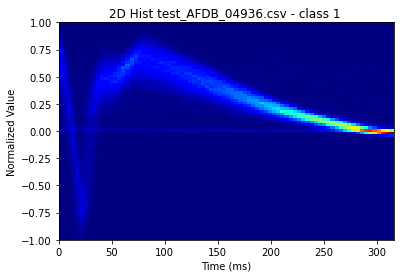

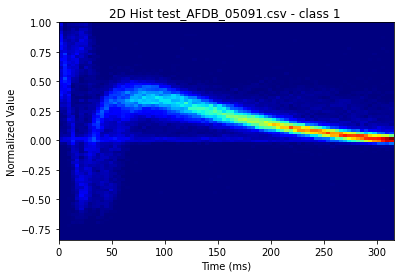

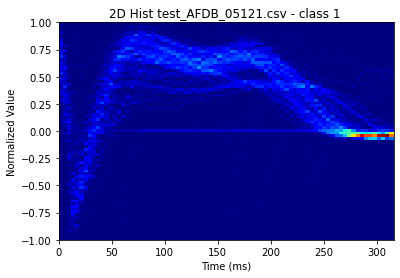

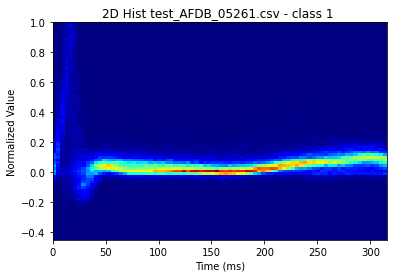

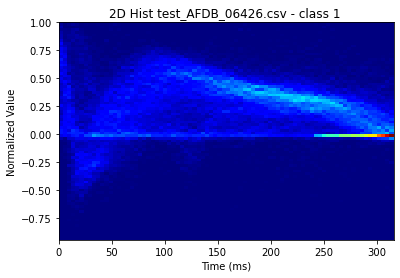

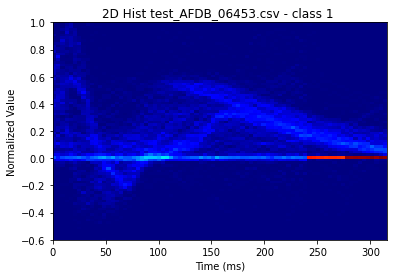

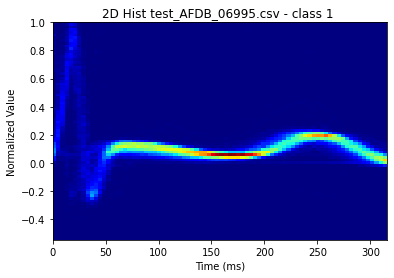

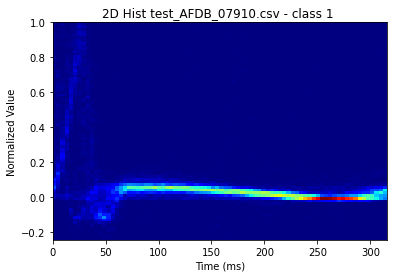

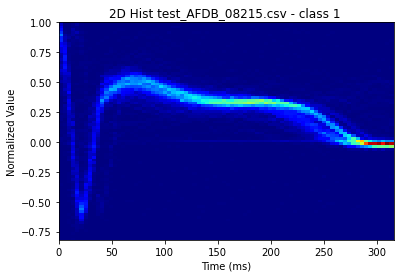

In [18]:
for tdf, name in zip(train_dfs, filenames):
    plot_hist(tdf, name, class_number=1, min_=0, size=80)